In [252]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from courses import testCourse


def generateSlopes(meters):
    slopes = np.random.normal(0, 10, meters)
    slopes = pd.Series(slopes).rolling(10).mean()
    slopes = slopes.fillna(0)

    # Find points where the slope is too steep and smooth them out
    for i in range(1, len(slopes)):
        if abs(slopes[i] - slopes[i-1]) > 10:
            slopes[i] = slopes[i-1]

    return slopes


def generateElevation(meters):
    slopes = generateSlopes(meters)
    return np.cumsum(slopes/100)


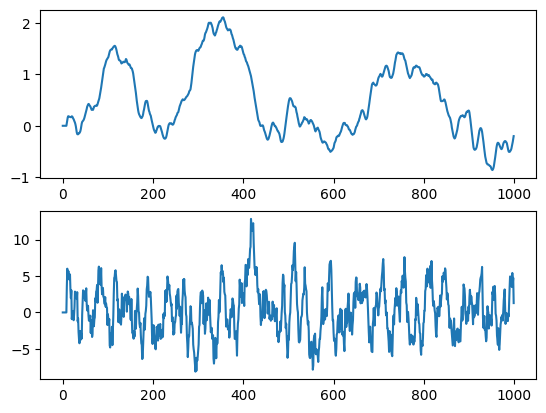

In [253]:
distance = 1000

testCourseElevation = generateElevation(distance)
testCourseGradient = generateSlopes(distance)

fig, axs = plt.subplots(2, 1)

axs[0].plot(testCourseElevation)
axs[1].plot(testCourseGradient)
